<a href="https://colab.research.google.com/github/mars241/PYTHON/blob/main/AAM_WCS_Pandas_Merge_and_fill_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

# Exécuter le code ci-dessous



In [ ]:
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

## You have now a DataFrame with lots of weather data.

## Vous avez maintenant un DataFrame avec beaucoup de données météorologiques.

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :
# Let's go in the deep !

# Maintenant, accomplissez les tâches suivantes :
# Allons dans les profondeurs !

## 1 - Merge
OK, you know very well the previous dataset. Now, you want more, much more. Another year for example ?

But it's too bad. The year 2018 is not in the good  shape. There are 2 files :
- The main file with Temperature, etc...
- The opinion file, with especially the Opinion

The goal is [to merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) both files in one DataFrame called **df2018**. It seems both files have a date column with the same format (but not the same name).

Think about checking if both datasets have the same length. If they don't, what kind of merge do you have to do to keep each date of the main dataset ? Then apply this specific merge.

## 1 - Fusionner
OK, vous connaissez très bien l'ensemble de données précédent. Maintenant, vous voulez plus, beaucoup plus. Une autre année par exemple ?

Mais c'est dommage. L'année 2018 n'est pas au mieux de sa forme. Il y a 2 fichiers :
- Le dossier principal avec la Température, etc...
- Le fichier d'opinion, avec surtout l'Opinion

Le but est de [fusionner](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) les deux fichiers dans un DataFrame appelé **df2018**. Il semble que les deux fichiers ont une colonne de date avec le même format (mais pas le même nom).

Pensez à vérifier si les deux ensembles de données ont la même longueur. Si ce n'est pas le cas, quel type de fusion devez-vous faire pour conserver chaque date de l'ensemble de données principal ? Appliquez ensuite cette fusion spécifique.

In [ ]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

In [ ]:
df_main.shape
# 365 lignes

(365, 15)

In [ ]:
df_opinion.shape
# 341 lignes

(341, 6)

In [ ]:
# On a vérifier que les deux datasets pas donc les même longueur
len(df_main['DATE']) == len(df_opinion['date'])

False

In [ ]:
#  les deux fichiers ont une colonne de date avec le même format (mais pas le même nom):
# 'date' pour df_main
# 'DATE' pour df_opinion

# Renommons la colonne 'date' en 'DATE' dans le DF "df_opinion", à l’aide d’un dicionnaire précisé au paramètre columns, avec comme clé le nom actuel de la colonne, et en valeur le nouveau nom :
#Parfois, Pour que le changement soit effectif, on indique inplace=True, sinon, la modification n’est pas apportée au dataframe.
#Synthaxe : df.rename(columns={"nom actuel de la colonne": "nouveau nom "}, inplace=True)

df_opinion = df_opinion.rename(columns = {'date':'DATE'})
df_opinion

,DATE,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,113,0,3,5.1,bad
1,2018-03-12,119,0,2,8.8,bad
2,2018-03-09,116,0,3,10.2,bad
3,2018-10-07,122,0,1,5.6,bad
4,2018-06-18,119,0,1,12.9,bad
...,...,...,...,...,...,...
336,2018-04-20,113,0,1,11.6,very good
337,2018-06-08,116,0,1,15.9,very good
338,2018-09-09,113,0,1,11.6,very good
339,2018-10-13,113,0,5,11.0,very good


In [ ]:
df_main
#  le format 'DATE' est au même format dans les deux datasets:

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7


In [ ]:
# TOPO  isna(); isnull(); dropna(); fillna(): Les deux sont identiques: isna() et isnull(): ( préférez toujours utiliser isna())
#Il est facile de se souvenir de ce que fait isna() car lorsque vous regardez la méthode numpy np.isnan(),
# elle vérifie les valeurs NaN. Dans pandas, il y a d'autres noms de méthodes similaires comme dropna(), fillna() qui gèrent les valeurs manquantes
# pandas : Détecter et compter les valeurs manquantes (NaN) avec isnull(), isna()
# pandas : Supprimer les valeurs manquantes (NaN) avec dropna()
# pandas : Remplacer les valeurs manquantes (NaN) avec fillna()

# La somme des valeurs nulles dans la colonne 'DATE':
df_opinion['DATE'].isna().sum()

# on a pas de valeur nulles dans "df_opinion"

0

In [ ]:
df_main['DATE'].isna().sum()

# on a pas aussi de valeur nulle dans "df_main"
# On peut donc faire notre "merge"=fusion sur des données presque propres.

0

In [ ]:
# Your code here :

# Votre code ici :

# Réponse à la question: type de fusion devez-vous faire pour conserver chaque date de l'ensemble de données principal ?
# On fait une union à gauche :
df2018 = pd.merge(df_main, df_opinion, how='left', on= 'DATE')

df2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,very bad
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,very bad
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,very bad
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,very bad


### Result

Your DataFrame **df2018** should now have 21 columns and 365 rows. If not, try again.

**Be careful:**
- if you've renamed your `date` column, then merged both DataFrames with `on` parameter, Pandas kept only one `DATE` column. So you'll have 20 columns in your DataFrame. And you can skip the "drop" step just after.
- if you merged with `left_on` and `right_on` parameters, Pandas kept both columns `DATE` and `date`, and you'll have 21 columns in your DataFrame. You can do this "drop" step:

Votre DataFrame **df2018** devrait maintenant comporter 21 colonnes et 365 lignes. Si ce n'est pas le cas, essayez à nouveau.

**Faites attention:**
- si vous avez renommé votre colonne `date`, puis fusionné les deux DataFrames avec le paramètre `on`, Pandas ne conservera qu'une seule colonne `DATE`. Vous aurez donc 20 colonnes dans votre DataFrame. Et vous pouvez sauter l'étape "drop" juste après.
- si vous avez fusionné avec les paramètres `left_on` et `right_on`, Pandas a conservé les deux colonnes `DATE` et `date`, et vous aurez 21 colonnes dans votre DataFrame. Vous pouvez effectuer cette étape de "chute" :




In [ ]:
df2018.shape

# Comme on a 20 colonnes dans notre DataFrame, donc saute l'étape "drop" juste après!

(365, 20)

In [ ]:
# You should now probably drop the "date" column.
# This column is incomplete, it were provided from the opinion file.
# It was very useful to perform the "merge". But we don't need it anymore.

# Read and execute the code below :

# Vous devriez maintenant probablement laisser tomber la colonne "date".
# Cette colonne est incomplète, elle a été fournie par le fichier d'opinion.
# Elle était très utile pour effectuer la "fusion". Mais nous n'en avons plus besoin.

# Lisez et exécutez le code ci-dessous :
df2018.drop('date',             # Select column to drop
            axis = 1,           # Precise if you want to drop a column (1) or a row (0)
            inplace = True)     # If we don't use this argument, result is not stored


                                # Sélectionner la colonne à déposer
                                # Précisez si vous voulez déposer une colonne (1) ou une ligne (0)
                                # Si on n'utilise pas cet argument, le résultat n'est pas stocké

Now, everybody should have a 20 columns and 365 rows.

**Ohhhh, there are some missing values, we have to fill them. That will be the goal of this quest: to learn how to fill in the missing values, column by column, with different techniques.**

Maintenant, tout le monde devrait avoir 20 colonnes et 365 lignes.

**Ohhhh, il y a quelques valeurs manquantes, nous devons les remplir. Ce sera le but de cette quête : apprendre à remplir les valeurs manquantes, colonne par colonne, avec différentes techniques.**

In [ ]:
# Just execute the code below, to display a "non-null" column :

# Il suffit d'exécuter le code ci-dessous, pour afficher une colonne "non nulle" :
print("My DataFrame shape is : ", df2018.shape, end = '\n\n\n\n')
print('Which columns have missing values ? (Non-null column)')
print(df2018.info())

# Nous remarquons qu'il y a 5 colonnes qui comportent des au moins 5(=365-341) valeurs nulles
# 15  WEATHER_CODE_EVENING    341 non-null    float64
# 16  TOTAL_SNOW_MM           341 non-null    float64
# 17  UV_INDEX                341 non-null    float64
# 18  SUNHOUR                 341 non-null    float64
# 19  OPINION

My DataFrame shape is :  (365, 20)



Which columns have missing values ? (Non-null column)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEW

### Find and display the Dates of missing values.
You can help you with the method `.isna()`

You have to find 24 different dates.

### Trouver et afficher les dates des valeurs manquantes.
Vous pouvez vous aider de la méthode `.isna()`.

Vous devez trouver 24 dates différentes.

In [ ]:
# Your code here :

# votre code ici:
df2018.isna().sum()

# on a bien 24  pour
#WEATHER_CODE_EVENING      24
#TOTAL_SNOW_MM             24
#UV_INDEX                  24
#SUNHOUR                   24
#OPINION                   24

DATE                       0
MAX_TEMPERATURE_C          0
MIN_TEMPERATURE_C          0
WINDSPEED_MAX_KMH          0
TEMPERATURE_MORNING_C      0
TEMPERATURE_NOON_C         0
TEMPERATURE_EVENING_C      0
PRECIP_TOTAL_DAY_MM        0
HUMIDITY_MAX_PERCENT       0
VISIBILITY_AVG_KM          0
PRESSURE_MAX_MB            0
CLOUDCOVER_AVG_PERCENT     0
HEATINDEX_MAX_C            0
DEWPOINT_MAX_C             0
WINDTEMP_MAX_C             0
WEATHER_CODE_EVENING      24
TOTAL_SNOW_MM             24
UV_INDEX                  24
SUNHOUR                   24
OPINION                   24
dtype: int64

In [ ]:
# Autrement
df2018_nan = df2018.loc[df2018['TOTAL_SNOW_MM'].isna()==True]

df2018_nan['DATE']

Series([], Name: DATE, dtype: datetime64[ns])

## 2 - Before filling missing values, you have to create a new axis "flag", to document and to remember which lines you modify.

## 2 - Avant de remplir les valeurs manquantes, vous devez créer un nouvel axe "drapeau", pour documenter et se souvenir des lignes que vous modifiez.

In [ ]:
# Just execute the code below :

# Il suffit d'exécuter le code ci-dessous :

df2018['flag'] = df2018['OPINION'].isna()
df2018['flag'].value_counts()

False    341
True      24
Name: flag, dtype: int64

## 3 - Visualize and Fill the NaN

## 3 - Visualiser et remplir les NaN

### 3.1 - First column : WEATHER_CODE_EVENING

You have to visualize how are the well-filled data. Of course you know Matplotlib, and maybe, you know Seaborn and Plotly. But, did you know that Pandas integrate directly some parts of Matplotlib ? It's very useful, and don't need to import other libraries...

### 3.1 - Première colonne : WEATHER_CODE_EVENING

Vous devez visualiser comment sont les données bien remplies. Bien sûr, vous connaissez Matplotlib, et peut-être, vous connaissez Seaborn et Plotly. Mais, saviez-vous que Pandas intègre directement certaines parties de Matplotlib ? C'est très utile, et vous n'avez pas besoin d'importer d'autres bibliothèques...

#### Scatterplot directly with Pandas

#### Nuage de points directement avec Pandas

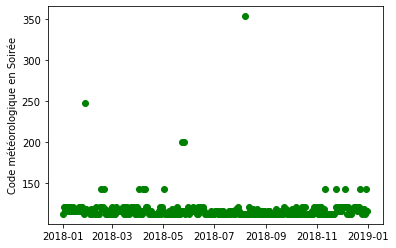

In [ ]:
# Draw a scatterplot with Date on X-axis and WEATHER_CODE_EVENING on Y-axis

# Dessinez un nuage de points avec la date sur l'axe des X et WEATHER_CODE_EVENING sur l'axe des Y.

#df2018.plot.scatter( ) #Code to complete # Complèter ce code

import pandas as pd
import matplotlib.pyplot as plot
from datetime import datetime

df2018['DATE'] = pd.to_datetime(df2018['DATE'])

plot.scatter(x=df2018['DATE'], y=df2018['WEATHER_CODE_EVENING'], color='green')
plot.ylabel("Code météorologique en Soirée")

plot.show()

#### Boxplot directly with Pandas

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

#### Boxplot directement avec Pandas

Vous trouverez ici [un peu d'aide](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

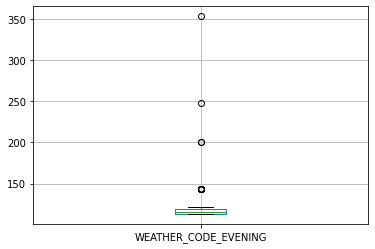

In [ ]:
# Find a way to draw directly with pandas a boxplot on the column WEATHER_CODE_EVENING

# Trouver un moyen de dessiner directement avec pandas un boxplot sur la colonne WEATHER_CODE_EVENING.

boxplot = df2018.boxplot(column=['WEATHER_CODE_EVENING'])

#### Deciles

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

#### Déciles

Vous trouverez ici [un peu d'aide](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

In [ ]:
# Find a way to print the 9 deciles + min + max of the column WEATHER_CODE_EVENING with the quantile method of pandas and a loop

# Trouver un moyen d'imprimer les 9 déciles + min + max de la colonne WEATHER_CODE_EVENING avec la méthode des quantiles de pandas et une boucle.

df2018.sort_values(by =['WEATHER_CODE_EVENING'], inplace = True)
df2018['WEATHER_CODE_EVENING']

# On a des valeurs numériques dans la colonne 'WEATHER_CODE_EVENING', On peut donc coupé notre échantillon en 4 parts égales(Methode des quantiles !):
#le traitement se fait dans la cellule plus bas !

0      113.0
195    113.0
196    113.0
198    113.0
201    113.0
       ...  
317      NaN
321      NaN
325      NaN
346      NaN
349      NaN
Name: WEATHER_CODE_EVENING, Length: 365, dtype: float64

In [ ]:
# Essaie de réponse :Trouver un moyen d'imprimer les 9 déciles + min + max de la colonne WEATHER_CODE_EVENING avec la méthode des quantiles de pandas et une boucle.
import pandas as pd
from datetime import datetime


df_weather_code_evening = df2018['WEATHER_CODE_EVENING'] # définition et initialisation de la DF/colonne qui nous interesse
#Méthode pandas.DataFrame.quantile :Signature de la méthode quantile
def quantile(self, q=0.5, axis=0, numeric_only=True, interpolation='linear'): #
  for i in len(df2018['WEATHER_CODE_EVENING']):
    df_weather_code_evening.quantile(0.5, method="table", numeric_only=True)
    return quantile

print(quantile)

#TOPO sur les possibles interpolations:
# interpolation : {'linear', 'lower', 'higher', 'midpoint', 'nearest'}
# Ce paramètre optionnel spécifie la méthode d'interpolation à utiliser,
# lorsque le quantile souhaité se situe entre deux points de données `i` et `j`:

#            * linear: `i + (j - i) * fraction`, where `fraction` est la
#             partie fractionnaire de l'indice entourée de `i` and `j`.
#            * lower: `i`.
#            * higher: `j`.
#            * nearest: `i` ou `j` selon le cas le plus proche.
#            * midpoint: (`i` + `j`) / 2.

#df_weather_code_evening.quantile
#df2018['WEATHER_CODE_EVENING']

<function quantile at 0x7ff706904310>


In [ ]:
# Réponse :Trouver un moyen d'imprimer les 9 déciles + min + max de la colonne WEATHER_CODE_EVENING avec la méthode des quantiles de pandas et une boucle.
# Autrement mieux:
i = 0.1
n = 1
print('valeur minimum est :', df2018['WEATHER_CODE_EVENING'].quantile(0))
while i <= 0.9:
  print('decile', n, 'est :', df2018['WEATHER_CODE_EVENING'].quantile(i))
  i += 0.1
  n += 1
print('valeur maximum est :', df2018['WEATHER_CODE_EVENING'].quantile(1))

valeur minimum est : 113.0
decile 1 est : 113.0
decile 2 est : 113.0
decile 3 est : 113.0
decile 4 est : 113.0
decile 5 est : 116.0
decile 6 est : 116.0
decile 7 est : 118.50733137829911
decile 8 est : 122.0
decile 9 est : 122.0
valeur maximum est : 353.0


#### Fill values
OK it seems that the most of datas are between 113 and 122. Maybe, we could fill the missing values with Mean or Median, it's up to you to choose. So you need :
- Calculate the mean or the median
- Fill the missing values only for **WEATHER_CODE_EVENING** with the `fillna()` method

When you're OK, remember tu use the `inplace=True` argument, otherwise, your modification will not be stored.

#### Valeurs de remplissage
OK, il semble que la plupart des données se situent entre 113 et 122. Nous pourrions peut-être remplir les valeurs manquantes avec la moyenne ou la médiane, c'est à vous de choisir. Vous devez donc :
- Calculer la moyenne ou la médiane
- Remplir les valeurs manquantes uniquement pour **WEATHER_CODE_EVENING** avec la méthode `fillna()`.

Quand vous êtes OK, n'oubliez pas d'utiliser l'argument `inplace=True`, sinon, votre modification ne sera pas enregistrée.

In [ ]:
# Hop ! Your code here :

#mean_weather_column =       #You have to complete this
#df2018['WEATHER_CODE_EVENING'].fillna(mean_weather_column,
#                                      inplace = False) # When you are OK, you can replace this argument by True
#df2018['WEATHER_CODE_EVENING'].value_counts()


# Hop ! votre code ici :

# Calcule et remplaçement des valeurs maquantes par la moyenne avec l'opérateur "mean()":
mean_weather_column = df2018['WEATHER_CODE_EVENING'].mean()    #Vous devez compléter ceci
df2018['WEATHER_CODE_EVENING'].fillna(mean_weather_column,
                                      inplace = True) # Lorsque vous êtes OK, vous pouvez remplacer cet argument par True
df2018['WEATHER_CODE_EVENING'].value_counts()

113.000000    154
116.000000     78
122.000000     59
119.000000     34
118.507331     24
143.000000     12
200.000000      2
248.000000      1
353.000000      1
Name: WEATHER_CODE_EVENING, dtype: int64

In [ ]:
# Essayons avec le Calcule de la médiane pour procèder à une comparaison

# Hop ! votre code ici :

# Calcule et remplaçement des valeurs maquantes par la médiane avec l'opérateur "median()":
median_weather_column = df2018['WEATHER_CODE_EVENING'].median()    #Vous devez compléter ceci
df2018['WEATHER_CODE_EVENING'].fillna(median_weather_column,
                                      inplace = True) # Lorsque vous êtes OK, vous pouvez remplacer cet argument par True
df2018['WEATHER_CODE_EVENING'].value_counts()

# Même résultat, On remarque median()= mean()

113.000000    154
116.000000     78
122.000000     59
119.000000     34
118.507331     24
143.000000     12
200.000000      2
248.000000      1
353.000000      1
Name: WEATHER_CODE_EVENING, dtype: int64

In [ ]:
# You can use this code to check how many missing values you have :
# Vous pouvez utiliser ce code pour vérifier combien de valeurs manquantes vous avez :
column_name = 'WEATHER_CODE_EVENING'
print("J'ai " ,df2018[column_name].isna().sum(), "des valeurs manquantes dans la colonne", column_name)

#Parfait , on a plus de valeur manquantes!

J'ai  0 des valeurs manquantes dans la colonne WEATHER_CODE_EVENING


### 3.2 - Next columns : TOTAL_SNOW_MM and UV_INDEX

We trust you to choose right values to fill for both columns

### 3.2 - Colonnes suivantes : TOTAL_SNOW_MM et UV_INDEX

Nous vous faisons confiance pour choisir les bonnes valeurs à remplir pour les deux colonnes.

In [ ]:
# A priori, Vérifions combient il y a de NaN :

print("J'ai" ,df2018['TOTAL_SNOW_MM'].isna().sum(), " valeurs manquantes dans la colonne TOTAL_SNOW_MM")
print("J'ai" ,df2018['UV_INDEX'].isna().sum(), " valeurs manquantes dans la colonne UV_INDEX ")

J'ai 0  valeurs manquantes dans la colonne TOTAL_SNOW_MM
J'ai 0  valeurs manquantes dans la colonne UV_INDEX 


In [ ]:
# Your code here:

# votre code ici :

mean_total_snow = df2018['TOTAL_SNOW_MM'].mean()
mean_uv = df2018['UV_INDEX'].mean()

df2018['TOTAL_SNOW_MM'].fillna(mean_total_snow, inplace = True)
df2018['UV_INDEX'].fillna(mean_uv, inplace = True)

In [ ]:
# A  posteriori,  Vérifions combient il y a de NaN :

print("I have " ,df2018['TOTAL_SNOW_MM'].isna().sum(), "missing values in the column TOTAL_SNOW_MM.")
print("I have " ,df2018['UV_INDEX'].isna().sum(), "missing values in the column UV_INDEX.")

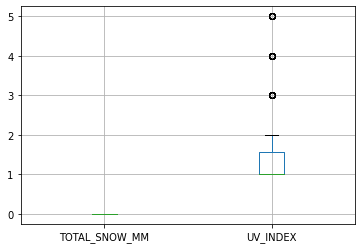

In [ ]:
# Autrement
# Votre code ici :

"""
Pour vérifier si les valeurs aberrantes peuvent surestimer la valeur de la moyenne pour les deux colonnes, On vas commencer par dessiner un boxplot.
"""
df2018.boxplot(column=['TOTAL_SNOW_MM' , 'UV_INDEX'])

In [ ]:
# Autrement
"""
Comme nous pouvons le voir, il n'y a pas de valeur aberrante pour ces colonnes, comme toutes les valeurs que nous avons pour TOTAL_SNOW_MM sont 0, je vais remplacer les valeurs manquantes par 0.
Concernant le UV_INDEX, nous pouvons voir que toutes les données sont comprises entre 1 et 5, je choisis donc de remplacer la valeur manquante par la moyenne.
"""
median_uv_column = df2018['UV_INDEX'].quantile(0.5)

df2018['UV_INDEX'].fillna(median_uv_column, inplace = True) # Lorsque vous êtes OK, vous pouvez remplacer cet argument par True
print(df2018['UV_INDEX'].value_counts())

column_name = 'UV_INDEX'
print("\n J'ai " ,df2018[column_name].isna().sum(), " valeurs manquantes dans la colonne ", column_name)

1.00000    260
3.00000     30
4.00000     26
1.57478     24
2.00000     14
5.00000     11
Name: UV_INDEX, dtype: int64

 J'ai  0  valeurs manquantes dans la colonne  UV_INDEX


### 3.3 - Next column :
SUNHOUR

### 3.3 - Colonne suivante :
HEURE DU SOLEIL

Text(0, 0.5, 'Sun Hour')

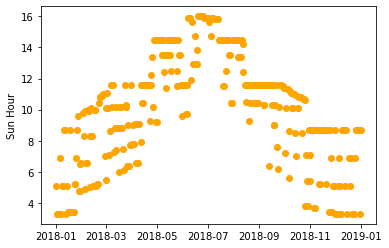

In [ ]:
# Draw a scatterplot with Date on X-axis and SUNHOUR on Y-axis*

# Dessinez un nuage de points avec la date sur l'axe des X et l'heure du soleil sur l'axe des Y*.

df2018['DATE'] = pd.to_datetime(df2018['DATE'])

plot.scatter(x=df2018['DATE'], y=df2018['SUNHOUR'], color='Orange')
plot.ylabel("Sun Hour")




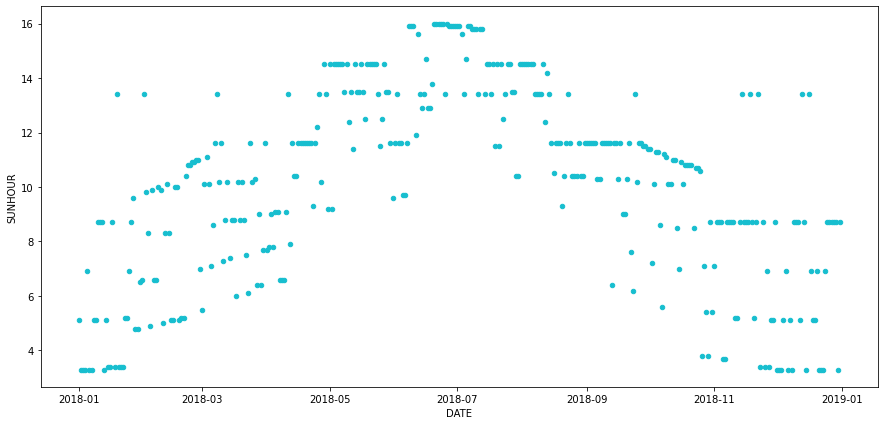

In [ ]:
# Autrement
df2018['DATE'] = pd.to_datetime(df2018['DATE'])
df2018.plot.scatter(x = 'DATE', y = 'SUNHOUR', c = 'C9', figsize=(15,7));

#### Propagation
**It seems this is not a good idea to apply the same value all year long...**

You could use the the `method = 'ffill'` or `'bfill'` argument in `fillna()` to propagate non-null values forward or backward.

#### Propagation
**Il semble que ce ne soit pas une bonne idée d'appliquer la même valeur toute l'année...**

Vous pouvez utiliser l'argument `method = 'ffill'` ou `'bfill'` dans `fillna()` pour propager des valeurs non nulles en avant ou en arrière.

In [ ]:
# Your code here

# Votre code ici :

df2018['SUNHOUR'] = df2018['SUNHOUR'].ffill().bfill()

In [ ]:
df2018.isna().sum()

DATE                       0
MAX_TEMPERATURE_C          0
MIN_TEMPERATURE_C          0
WINDSPEED_MAX_KMH          0
TEMPERATURE_MORNING_C      0
TEMPERATURE_NOON_C         0
TEMPERATURE_EVENING_C      0
PRECIP_TOTAL_DAY_MM        0
HUMIDITY_MAX_PERCENT       0
VISIBILITY_AVG_KM          0
PRESSURE_MAX_MB            0
CLOUDCOVER_AVG_PERCENT     0
HEATINDEX_MAX_C            0
DEWPOINT_MAX_C             0
WINDTEMP_MAX_C             0
WEATHER_CODE_EVENING       0
TOTAL_SNOW_MM              0
UV_INDEX                   0
SUNHOUR                    0
OPINION                   24
flag                       0
dtype: int64

In [ ]:
# Autrement
df2018['SUNHOUR'] = df2018['SUNHOUR'].bfill()

column_name = 'SUNHOUR'
print("\n J'ai " ,df2018[column_name].isna().sum(), " valeurs manquantes dans la colonne ", column_name)


 J'ai  0  valeurs manquantes dans la colonne  SUNHOUR


### 3.4 - Column : OPINION
For Opinion, we have not yet idea. So, we can write a new value 'unknown' in this column.

### 3.4 - Colonne : OPINION
Pour Opinion, nous n'avons pas encore d'idée. Nous pouvons donc écrire une nouvelle valeur 'inconnu' dans cette colonne.

In [ ]:
# Your code here

# Votre code ici :
df2018['OPINION'] = df2018['OPINION'].fillna("unknown")
df2018['OPINION']


0                   bad
195           very good
196                good
198                good
201    not good not bad
             ...       
317             unknown
321             unknown
325             unknown
346             unknown
349             unknown
Name: OPINION, Length: 365, dtype: object

In [ ]:
# Autrement
df2018['OPINION'].fillna('unknown', inplace = True) # When you are OK, you can replace this argument by True
print(df2018['OPINION'].value_counts())

column_name = 'OPINION'
print("\n J'ai " ,df2018[column_name].isna().sum(), "valeurs manquantes dans la colonne", column_name)


good                91
very bad            82
bad                 79
not good not bad    68
unknown             24
very good           21
Name: OPINION, dtype: int64

 J'ai  0 valeurs manquantes dans la colonne OPINION


## Now, each axis should have 365 non-null values.

## Maintenant, chaque axe devrait avoir 365 valeurs non nulles.

In [ ]:

df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 349
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

## 4 - Visualize your modifications
Draw 4 scatterplots with Date on X-axis, and each of the 4 numeric modified columns on Y-axis :
- The original datas will be in blue
- The new data (your datas) in red

It's the moment to use your "flag" column created at the beginning. It'll be easier in seaborn with `hue` argument.

You should get something like this:

## 4 - Visualisez vos modifications
Dessinez 4 diagrammes de dispersion avec la date sur l'axe des X, et chacune des 4 colonnes numériques modifiées sur l'axe des Y :
- Les données originales seront en bleu
- Les nouvelles données (vos données) en rouge

C'est le moment d'utiliser votre colonne "flag" créée au début. Ce sera plus facile dans seaborn avec l'argument `hue`.

Vous devriez obtenir quelque chose comme ceci :

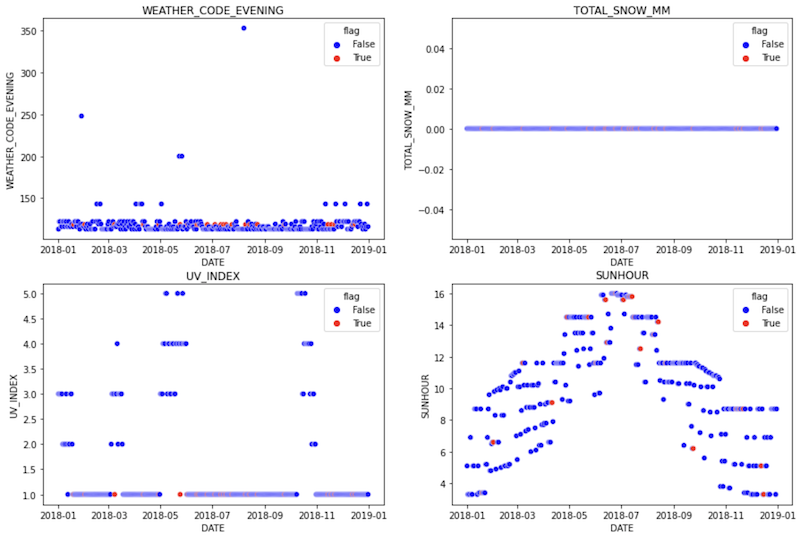

In [ ]:
# Your code here
# Votre code ici

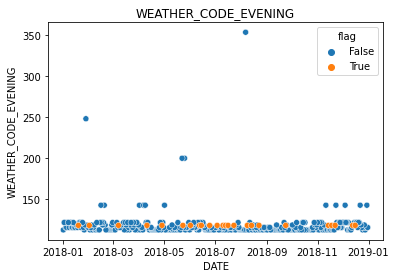

In [ ]:
import seaborn as sns

# Premier
sns.scatterplot(data=df2018, x='DATE', y='WEATHER_CODE_EVENING', hue= 'flag')
plot.title('WEATHER_CODE_EVENING')
plot.show()

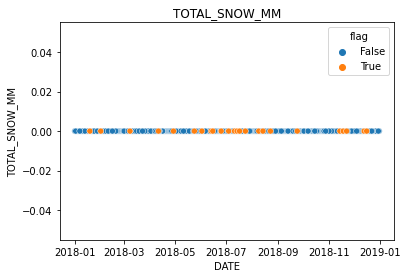

In [ ]:

# Seconde

sns.scatterplot(data=df2018, x='DATE', y='TOTAL_SNOW_MM', hue= 'flag')
plot.title('TOTAL_SNOW_MM')
plot.show()

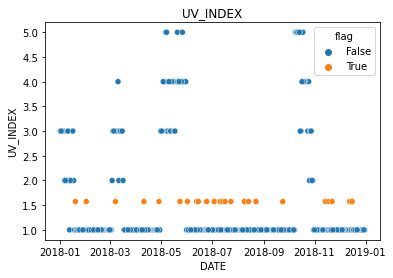

In [ ]:

# Troixième

sns.scatterplot(data=df2018, x='DATE', y='UV_INDEX', hue= 'flag')
plot.title('UV_INDEX')
plot.show()

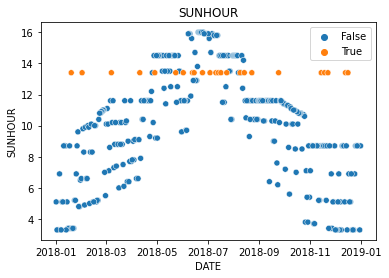

In [ ]:
# Quatrième:

sns.scatterplot(data=df2018, x='DATE', y='SUNHOUR', hue= 'flag')
plot.legend(loc='upper right')
plot.title('SUNHOUR')
plot.show()

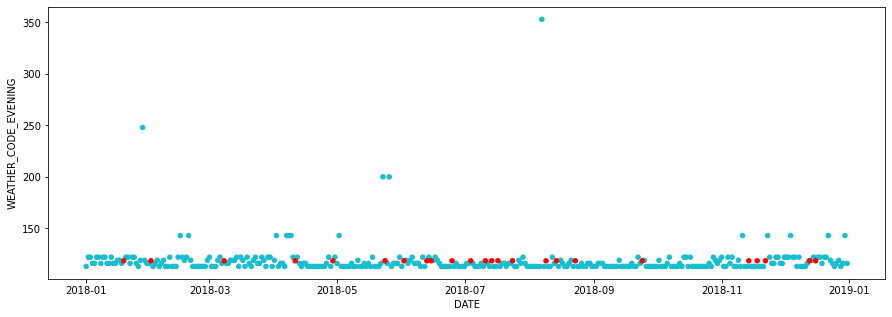

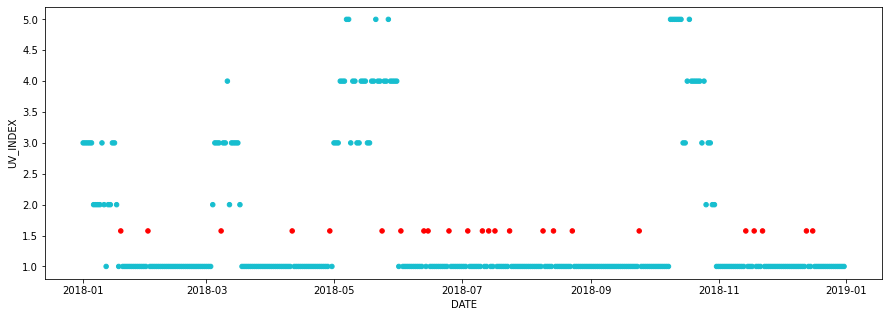

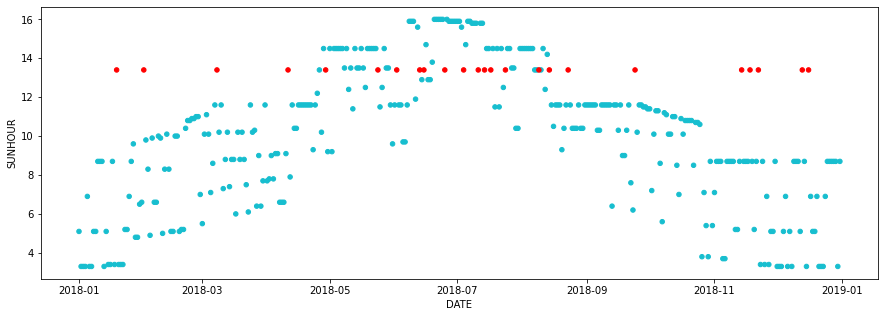

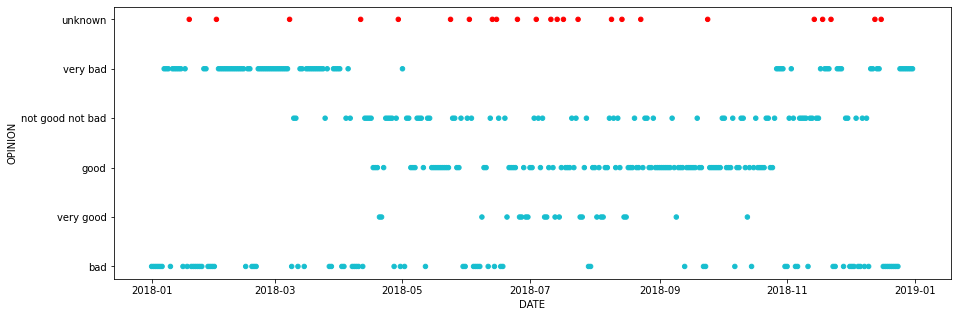

In [ ]:
# Autrement:
colors = ['r' if flag==1 else 'C9' for flag in df2018.flag]
df2018.plot.scatter(x = 'DATE', y = 'WEATHER_CODE_EVENING', color=colors, figsize=(15,5))
df2018.plot.scatter(x = 'DATE', y = 'UV_INDEX', color=colors, figsize=(15,5))
df2018.plot.scatter(x = 'DATE', y = 'SUNHOUR', color=colors, figsize=(15,5))
df2018.plot.scatter('DATE', 'OPINION', color=colors, figsize=(15,5))